### Project:

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
os.environ['KAGGLE_USERNAME']='lalitasharma04'
os.environ['KAGGLE_KEY']='83a1fd07f4e64ceff5d8826d0fbf6595'

In [3]:
!kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 96% 199M/207M [00:02<00:00, 86.9MB/s]
100% 207M/207M [00:02<00:00, 75.6MB/s]


In [4]:
! unzip covid-face-mask-detection-dataset.zip

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

In [5]:
main_dir='/content/New Masks Dataset'
train_dir=os.path.join(main_dir,'Train')
test_dir=os.path.join(main_dir,'Test')
valid_dir=os.path.join(main_dir,'Validation')

train_mask_dir=os.path.join(train_dir,'Mask')
train_nomask_dir=os.path.join(train_dir,'Non Mask')

In [6]:
train_mask_names=os.listdir(train_mask_dir)
print(train_mask_names[:10])

train_nomask_names=os.listdir(train_nomask_dir)
print(train_nomask_names[:10])

['0153.jpg', '0150.jpg', '1214.jpg', '1160.jpg', '0003.jpg', '1488.jpg', '0784.jpg', '1083.jpg', '0750.jpg', '0582.jpg']
['196.jpg', '57.jpg', '204.jpg', '61.jpg', '352.jpg', '319.jpg', '315.jpg', '203.jpg', '217.jpg', '172.jpg']


['/content/New Masks Dataset/Train/Mask/0153.jpg', '/content/New Masks Dataset/Train/Mask/0150.jpg', '/content/New Masks Dataset/Train/Mask/1214.jpg', '/content/New Masks Dataset/Train/Mask/1160.jpg', '/content/New Masks Dataset/Train/Mask/0003.jpg', '/content/New Masks Dataset/Train/Mask/1488.jpg', '/content/New Masks Dataset/Train/Mask/0784.jpg', '/content/New Masks Dataset/Train/Mask/1083.jpg']
['/content/New Masks Dataset/Train/Non Mask/196.jpg', '/content/New Masks Dataset/Train/Non Mask/57.jpg', '/content/New Masks Dataset/Train/Non Mask/204.jpg', '/content/New Masks Dataset/Train/Non Mask/61.jpg', '/content/New Masks Dataset/Train/Non Mask/352.jpg', '/content/New Masks Dataset/Train/Non Mask/319.jpg', '/content/New Masks Dataset/Train/Non Mask/315.jpg', '/content/New Masks Dataset/Train/Non Mask/203.jpg']


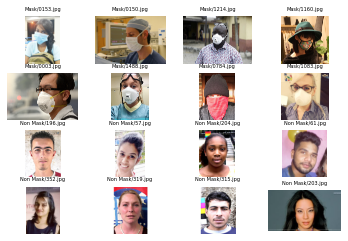

In [7]:
import matplotlib.image as mpimg
nrows=4
ncols=4
# plt.figure(figsize=(12,12))

mask_pic=[] #8 images from mask dir
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))
nomask_pic=[] #8 images from mask dir
for i in train_nomask_names[0:8]:
  nomask_pic.append(os.path.join(train_nomask_dir,i))
print(mask_pic)
print(nomask_pic)

merged_list=mask_pic+nomask_pic
for i in range(len(merged_list)):
  data=merged_list[i].split('/',4)[4]
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('off')
  image=mpimg.imread(merged_list[i])
  sp.set_title(data,fontsize=5)
  plt.imshow(image,cmap='gray')
plt.show()

In [17]:
train_datagen=ImageDataGenerator(rescale=1./255,
                              zoom_range=0.2,
                              shear_range=0.2,
                              # rotation_range=40,
                              horizontal_flip=True
                              )
test_datagen=ImageDataGenerator(rescale=1./255)
validation_datagen=ImageDataGenerator(rescale=1./255)

train_gen=train_datagen.flow_from_directory(train_dir,
                                                  target_size=(150,150),
                                                  batch_size=16,
                                                  class_mode='binary'
                                                  )
test_gen=test_datagen.flow_from_directory(test_dir,
                                          target_size=(150,150),
                                          batch_size=16,
                                          class_mode='binary'
                                          )
validation_gen=validation_datagen.flow_from_directory(valid_dir,
                                                  target_size=(150,150),
                                                  batch_size=16,
                                                  class_mode='binary'
                                                  )

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [18]:
train_gen.class_indices

{'Mask': 0, 'Non Mask': 1}

In [19]:
train_gen.image_shape

(150, 150, 3)

In [20]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


# ###########################################################

# model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.5))

# model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.5))

# model.add(Flatten())

# model.add(Dense(256,activation='relu'))
# model.add(Dropout(0.5))

# model.add(Dense(1,activation='sigmoid'))



In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9248)             

In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
model_saved=model.fit_generator(
        train_gen,
        epochs=10,
        validation_data=test_gen,
        )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
38/38 [==============================] - 41s 232ms/step - loss: 0.5096 - accuracy: 0.7325 - val_loss: 0.2510 - val_accuracy: 0.9200
Epoch 2/10
38/38 [==============================] - 8s 219ms/step - loss: 0.2670 - accuracy: 0.9034 - val_loss: 0.2454 - val_accuracy: 0.9400
Epoch 3/10
38/38 [==============================] - 8s 223ms/step - loss: 0.2416 - accuracy: 0.9165 - val_loss: 0.2351 - val_accuracy: 0.9300
Epoch 4/10
38/38 [==============================] - 8s 222ms/step - loss: 0.2159 - accuracy: 0.9216 - val_loss: 0.2304 - val_accuracy: 0.8900
Epoch 5/10
38/38 [==============================] - 8s 222ms/step - loss: 0.2395 - accuracy: 0.9107 - val_loss: 0.2420 - val_accuracy: 0.8900
Epoch 6/10
38/38 [==============================] - 8s 220ms/step - loss: 0.1815 - accuracy: 0.9369 - val_loss: 0.2308 - val_accuracy: 0.9000
Epoch 7/10
38/38 [==============================] - 8s 220ms/step - loss: 0.1691 - accuracy: 0.9362 - val_loss: 0.1973 - val_accuracy: 0.9000
Epoch

In [25]:
model.save('/content/drive/MyDrive/faceMaskU/faceMaskModel.h5',model_saved)

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
model_saved.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

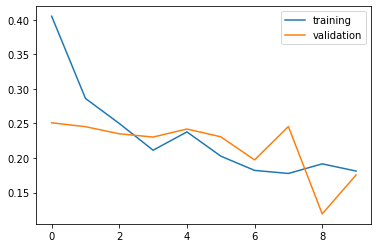

In [27]:
plt.plot(model_saved.history['loss'])
plt.plot(model_saved.history['val_loss'])
plt.legend(['training','validation'])

In [29]:
test_loss,test_acc=model.evaluate(test_gen)
print("test loss ",test_loss,' accuracy ',test_acc)

7/7 [==============================] - 1s 174ms/step - loss: 0.1755 - accuracy: 0.9200
test loss  0.17546959221363068  accuracy  0.9200000166893005


In [30]:
from google.colab import files
from keras.preprocessing import image
uploaded=files.upload()
for file in uploaded.keys():
  img_path='/content/'+file
  img=image.load_img(img_path,target_size=(150,150))
  images=image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction=model.predict(images)
  print(file)
  if prediction==0:
    print("mask")
  else:
    print("No mask")

Saving mask_wali.jpg to mask_wali.jpg
Saving no.jpg to no.jpg
Saving no_mask_wali.jpg to no_mask_wali.jpg
mask_wali.jpg
mask
no.jpg
No mask
no_mask_wali.jpg
No mask
